In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
num = 1

In [4]:
#train = pd.read_csv('0424new_train_'+str(num)+'.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'.csv')

In [5]:
#train = pd.read_csv('0424new_train_'+str(num)+'bb.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'bb.csv')

In [6]:
#train = pd.read_csv('0424new_train_'+str(num)+'cc.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'cc.csv')

In [7]:
#train = pd.read_csv('0427new_train_'+str(num)+'.csv')
#test = pd.read_csv('0427new_test_'+str(num)+'.csv')

In [8]:
#train = pd.read_csv('0503new_train_'+str(num)+'_change.csv')
#test = pd.read_csv('0503new_test_'+str(num)+'_change.csv')

In [9]:
train = pd.read_csv('0504new_train_'+str(num)+'_change.csv')
test = pd.read_csv('0504new_test_'+str(num)+'_change.csv')

In [10]:
#train = pd.read_csv('0505new_train_'+str(num)+'_change.csv')
#test = pd.read_csv('0505new_test_'+str(num)+'_change.csv')

In [11]:
#train = pd.read_csv('0424upsample.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'dd.csv')

In [12]:
#train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3, "E":4 }).astype(int)
#test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3, "E":4 }).astype(int)

In [13]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)

In [14]:
train = shuffle(train)
#test = shuffle(test)

In [15]:
#test

In [16]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [17]:
#train_feature

In [18]:
#test.reset_index( drop=True, inplace=True )
test_feature = test.columns[1:]
test_target = test.columns[0]
test_feature = test[test_feature]
test_y = test[test_target]
test_y = test_y.values
test_y = np_utils.to_categorical(test_y, num_classes = 4)

In [19]:
new_all_feature = preprocessing.scale(train_feature)
test_feature  = ( ( test_feature - train_feature.mean(axis=0) ) / train_feature.std(axis=0) )

In [20]:
#new_all_feature

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [22]:
model = tf.keras.models.Sequential()

In [23]:
model.add( tf.keras.layers.Dense(units=64, input_shape=[28],            #52,47  #28
           kernel_initializer='he_normal',
           kernel_regularizer= regularizers.l2(0.1),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
           activation='relu') )

In [24]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 300

In [25]:
#model.add(tf.keras.layers.Dense(units=32,
#               kernel_initializer='he_normal',  #he_normal
#               kernel_regularizer= regularizers.l2(0.1),   #0.06
##               bias_regularizer = regularizers.l2(0.05),                
##               activity_regularizer=regularizers.l2(0.001),
#               activation='relu'))   #relu

In [26]:
#model.add(tf.keras.layers.Dropout(0.4))  #ep 100    #0.5  #0.3

In [27]:
#model.add(tf.keras.layers.Dense(units=32,
#               kernel_initializer='he_normal',  #he_normal
#               kernel_regularizer= regularizers.l2(0.07),   #0.06  #0.07
##               kernel_regularizer= regularizers.l1_l2(0.07),           
##               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
#               activation='relu'))   #relu

In [28]:
#model.add(tf.keras.layers.Dropout(0.2))  #ep 100

In [29]:
model.add(tf.keras.layers.Dense(units=4, 
#                                kernel_initializer='normal',
                                activation='softmax'))    # kernel_initializer='normal',

In [30]:
adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )
#adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )

In [31]:
#sgd = keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.01, nesterov=False)

In [32]:
model.compile( optimizer = adam , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
#model.compile( optimizer = sgd , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [34]:
train_history = model.fit(new_all_feature , train_y,  
                          epochs = 50, batch_size = 15, verbose=2)   #一層500  三層1500 #15  #150 epoch

Epoch 1/50
 - 0s - loss: 11.5558 - acc: 0.2164
Epoch 2/50
 - 0s - loss: 10.7082 - acc: 0.2573
Epoch 3/50
 - 0s - loss: 10.0443 - acc: 0.2398
Epoch 4/50
 - 0s - loss: 9.3395 - acc: 0.3041
Epoch 5/50
 - 0s - loss: 8.7999 - acc: 0.2749
Epoch 6/50
 - 0s - loss: 8.0557 - acc: 0.4152
Epoch 7/50
 - 0s - loss: 7.5485 - acc: 0.4327
Epoch 8/50
 - 0s - loss: 7.0999 - acc: 0.4211
Epoch 9/50
 - 0s - loss: 6.6927 - acc: 0.4737
Epoch 10/50
 - 0s - loss: 6.2481 - acc: 0.4386
Epoch 11/50
 - 0s - loss: 5.9130 - acc: 0.4795
Epoch 12/50
 - 0s - loss: 5.5576 - acc: 0.4854
Epoch 13/50
 - 0s - loss: 5.2045 - acc: 0.4737
Epoch 14/50
 - 0s - loss: 4.9092 - acc: 0.5088
Epoch 15/50
 - 0s - loss: 4.6463 - acc: 0.5556
Epoch 16/50
 - 0s - loss: 4.4164 - acc: 0.4971
Epoch 17/50
 - 0s - loss: 4.1195 - acc: 0.5673
Epoch 18/50
 - 0s - loss: 3.8832 - acc: 0.5614
Epoch 19/50
 - 0s - loss: 3.6933 - acc: 0.5614
Epoch 20/50
 - 0s - loss: 3.4765 - acc: 0.5789
Epoch 21/50
 - 0s - loss: 3.3060 - acc: 0.5322
Epoch 22/50
 - 0s -

In [35]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train):
    plt.plot(train_history.history[train])
    #plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

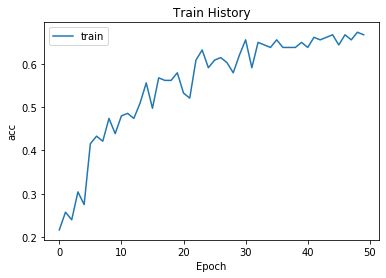

In [36]:
show_train_history(train_history,'acc')

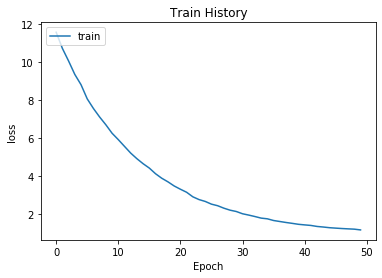

In [37]:
show_train_history(train_history,'loss')

In [38]:
test_out =  model.predict_classes(test_feature)

In [39]:
test_out

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1],
      dtype=int64)

In [40]:
prob = model.predict_proba(test_feature)

In [41]:
prob[0:10]

array([[0.5880577 , 0.2570236 , 0.10700115, 0.04791754],
       [0.63394636, 0.23672578, 0.05717792, 0.07214992],
       [0.8329444 , 0.0962272 , 0.02904684, 0.04178153],
       [0.35978794, 0.32381308, 0.21893047, 0.09746847],
       [0.5612843 , 0.20074493, 0.14544307, 0.09252765],
       [0.40025085, 0.2653717 , 0.21976829, 0.11460911],
       [0.660934  , 0.18586949, 0.09768553, 0.05551104],
       [0.720212  , 0.18206681, 0.052275  , 0.04544612],
       [0.5363091 , 0.28095752, 0.11972154, 0.06301182],
       [0.7429711 , 0.20172028, 0.0268507 , 0.02845797]], dtype=float32)

In [42]:
prob[10:16]

array([[0.689041  , 0.2584848 , 0.02629139, 0.02618275],
       [0.21837048, 0.47080275, 0.25668064, 0.05414616],
       [0.39490643, 0.3357062 , 0.13974446, 0.12964286],
       [0.7341077 , 0.17099273, 0.06872143, 0.02617814],
       [0.46095467, 0.3722498 , 0.09132501, 0.07547037],
       [0.30645904, 0.41203693, 0.18725756, 0.09424646]], dtype=float32)

In [43]:
prob[16:]

array([[0.28316632, 0.4413923 , 0.16181011, 0.11363122],
       [0.1271165 , 0.59944993, 0.21950676, 0.05392684],
       [0.38583717, 0.35649097, 0.15575686, 0.10191499],
       [0.3602046 , 0.46784297, 0.12916145, 0.04279086]], dtype=float32)

In [44]:
test['HOSDAY'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3])

In [45]:
pd.crosstab( test['HOSDAY'].values, test_out, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,10,0
1,4,2
2,1,2
3,0,1


In [46]:
score2 = model.evaluate(test_feature, test_y, verbose=2)
score2

[1.3114712238311768, 0.6000000238418579]

In [47]:
#model.save('gggood.h5')

In [48]:
#model2 = tf.contrib.keras.models.load_model('ggg.h5')

In [49]:
#scores = model2.evaluate(test_feature, test_y, verbose=2)

In [50]:
#scores

In [51]:
#model3 = tf.contrib.keras.models.load_model('gggood.h5')

In [52]:
#scores3 = model3.evaluate(test_feature, test_y, verbose=2)

In [53]:
#scores3